# Fraud Detection

In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore


## Data Analysis and Preprocessing

### Data Loading

In [2]:
from scripts.fraud_detection import load_data
credit_card_data, fraud_data, ip_address_country = load_data('docs')


### Verify The Loaded Dataset

### Credit Card Data

In [3]:
credit_card_data.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
credit_card_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Fraud Data

In [5]:
fraud_data.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
fraud_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


### Ip Address to Country

In [7]:
ip_address_country.tail()


,lower_bound_ip_address,upper_bound_ip_address,country
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore
138845,3.758096e+09,3758096383,Australia


In [8]:
ip_address_country.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Handle Missing Values

In [9]:
from scripts.fraud_detection import find_missing_values


### Fing Missing Values Of Credit Card Data

In [10]:
find_missing_values(credit_card_data)


From 31 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


### Fing Missing Values Of Fraud Data


In [11]:
find_missing_values(fraud_data)


From 11 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


### Fing Missing Values Of Ip Address to Country Data


In [12]:
find_missing_values(ip_address_country)


From 3 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


### Data Cleaning

In [13]:
fraud_data['ip_address'] = fraud_data['ip_address'].astype(int)
ip_address_country['lower_bound_ip_address'] = ip_address_country['lower_bound_ip_address'].astype(int)


### Exploratory Data Analysis (EDA)

### Univariate analysis

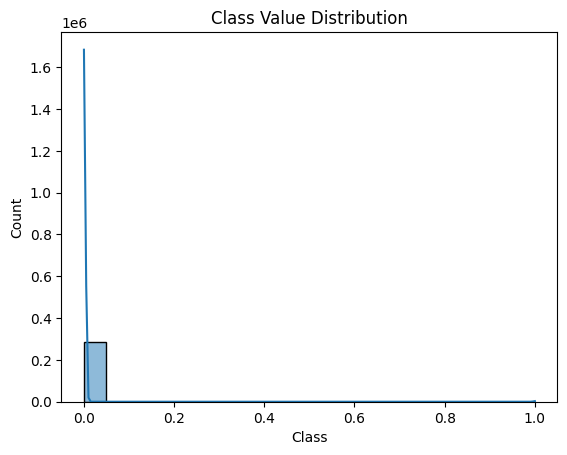

In [14]:
sns.histplot(credit_card_data['Class'], kde=True)
plt.title('Class Value Distribution')
plt.show()


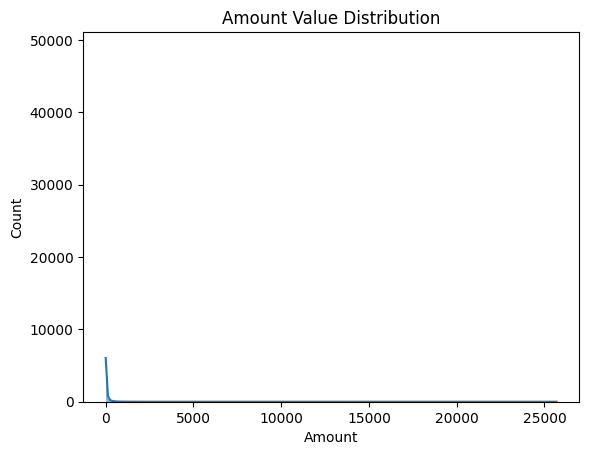

In [15]:
sns.histplot(credit_card_data['Amount'], kde=True)
plt.title('Amount Value Distribution')
plt.show()


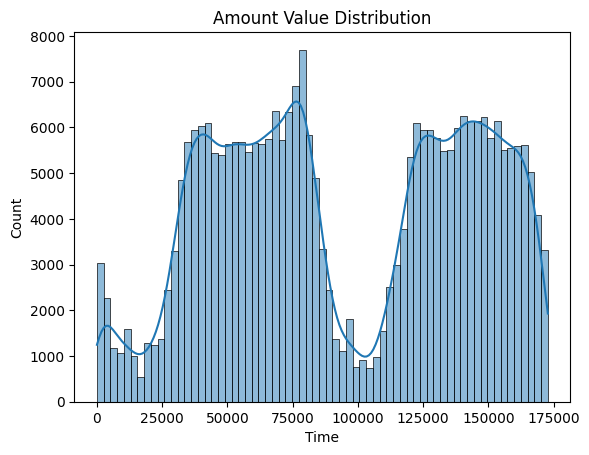

In [16]:
sns.histplot(credit_card_data['Time'], kde=True)
plt.title('Amount Value Distribution')
plt.show()


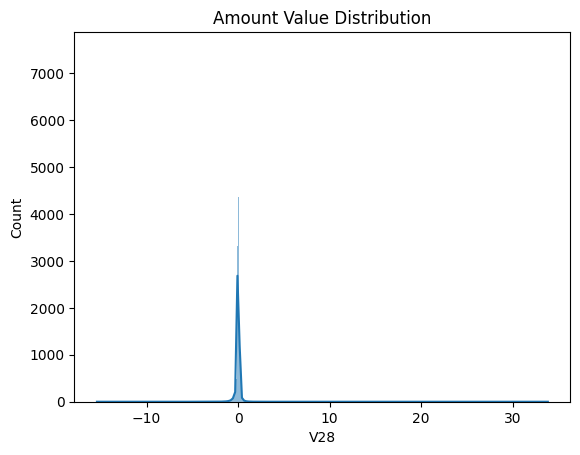

In [17]:
sns.histplot(credit_card_data['V28'], kde=True)
plt.title('Amount Value Distribution')
plt.show()


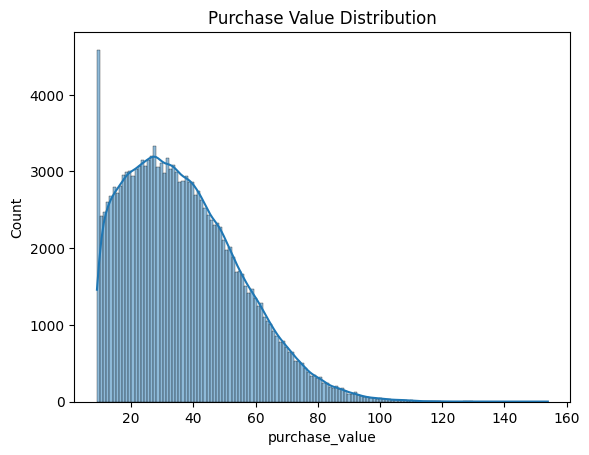

In [18]:
sns.histplot(fraud_data['purchase_value'], kde=True)
plt.title('Purchase Value Distribution')
plt.show()


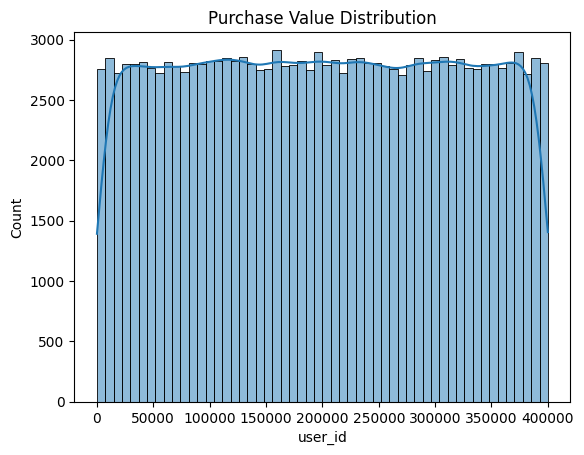

In [19]:
sns.histplot(fraud_data['user_id'], kde=True)
plt.title('Purchase Value Distribution')
plt.show()


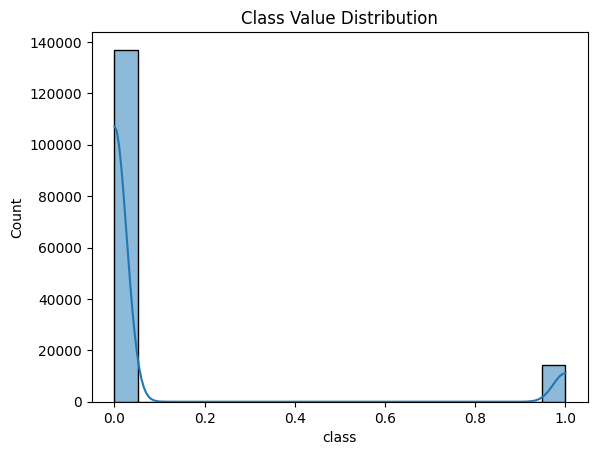

In [20]:
sns.histplot(fraud_data['class'], kde=True)
plt.title('Class Value Distribution')
plt.show()


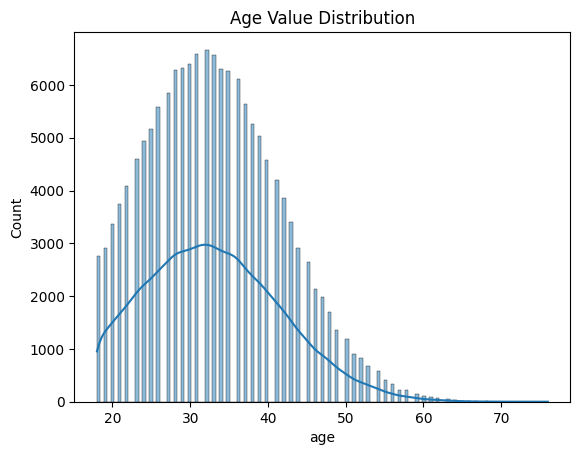

In [21]:
sns.histplot(fraud_data['age'], kde=True)
plt.title('Age Value Distribution')
plt.show()


In [22]:
columns_fraud_data=['source','browser','sex','class']


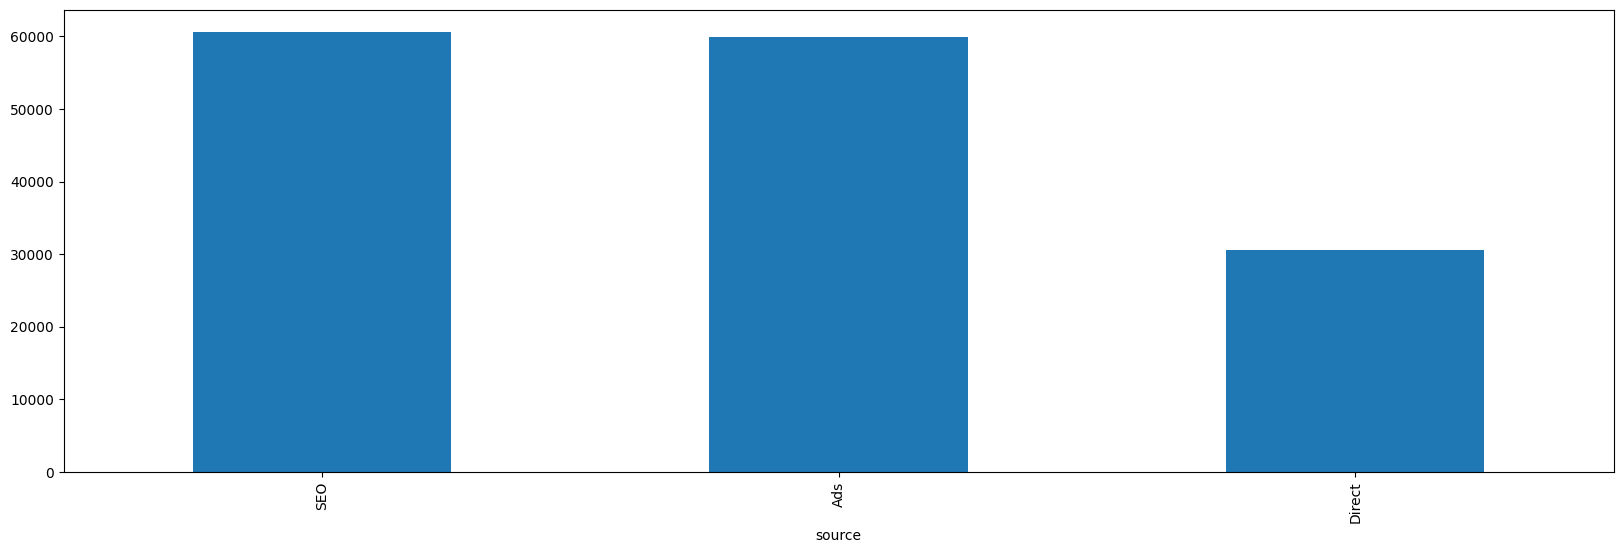

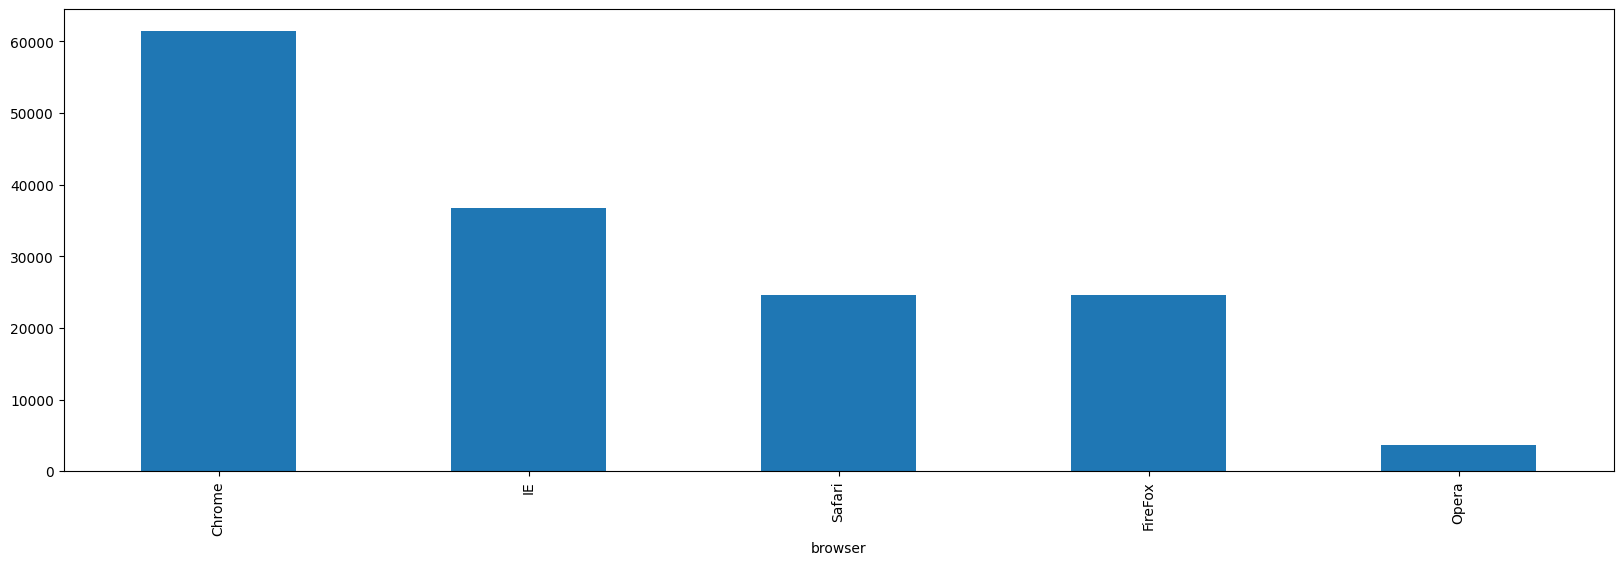

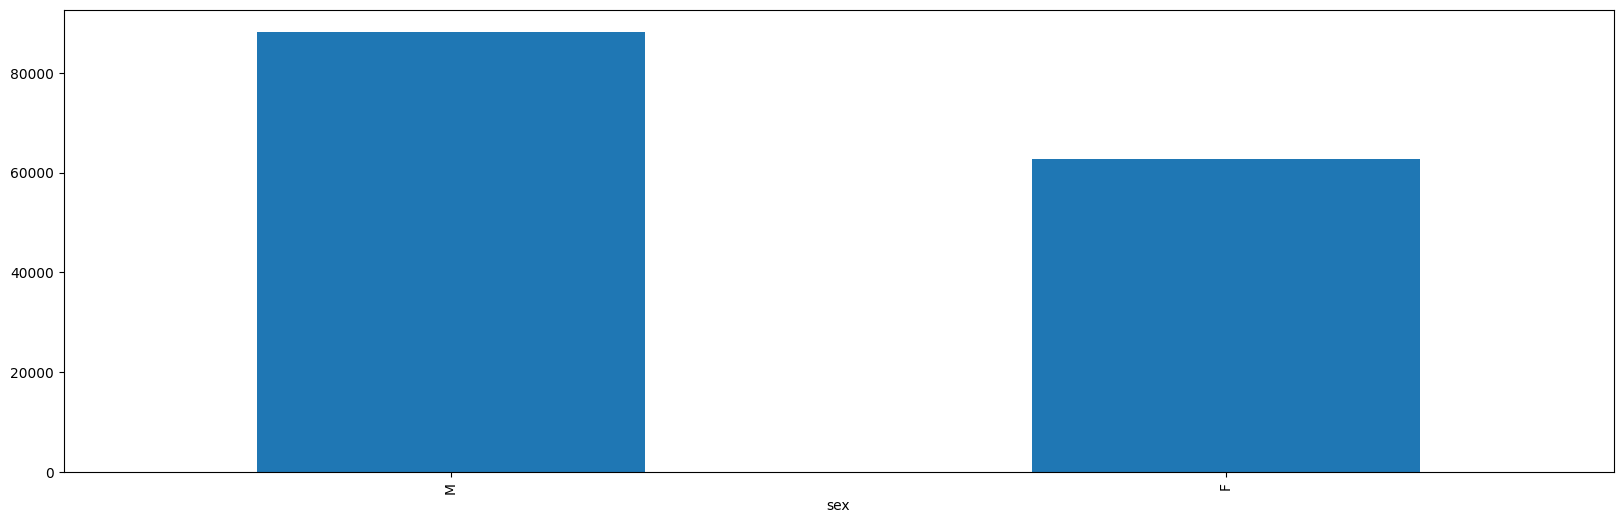

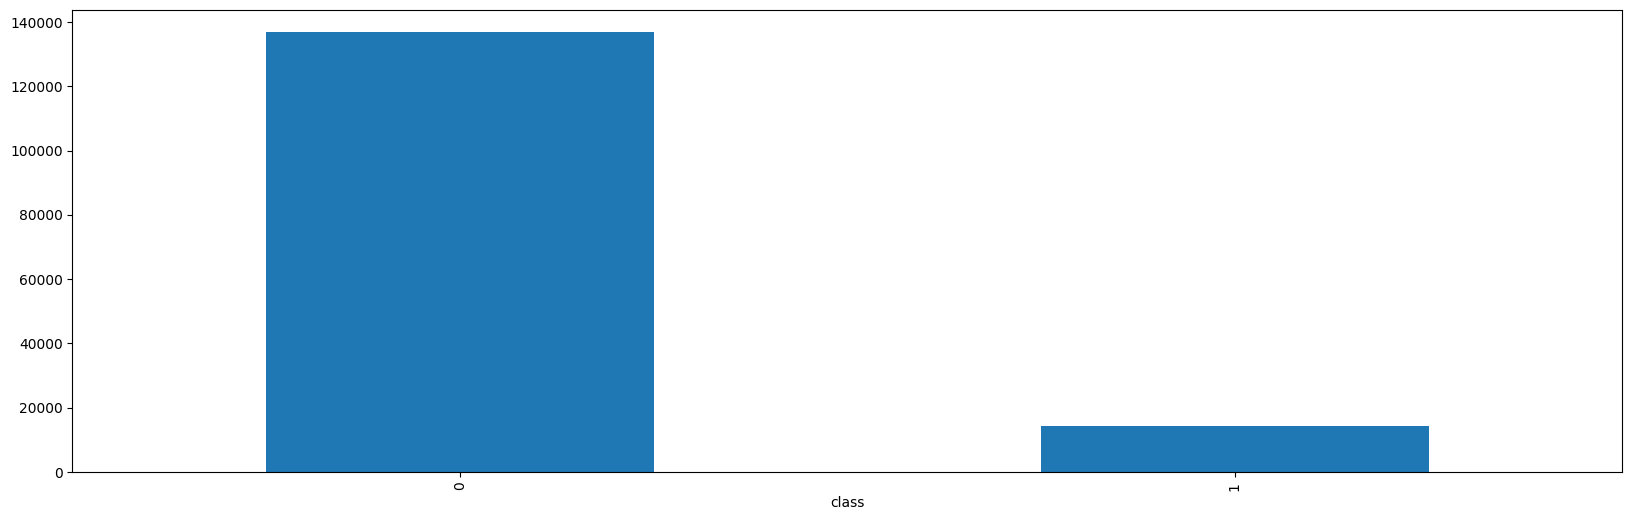

In [23]:
for column in columns_fraud_data:
    fraud_data[column].value_counts().plot(kind='bar',figsize=(20,6))
    plt.show()


<Axes: xlabel='country'>

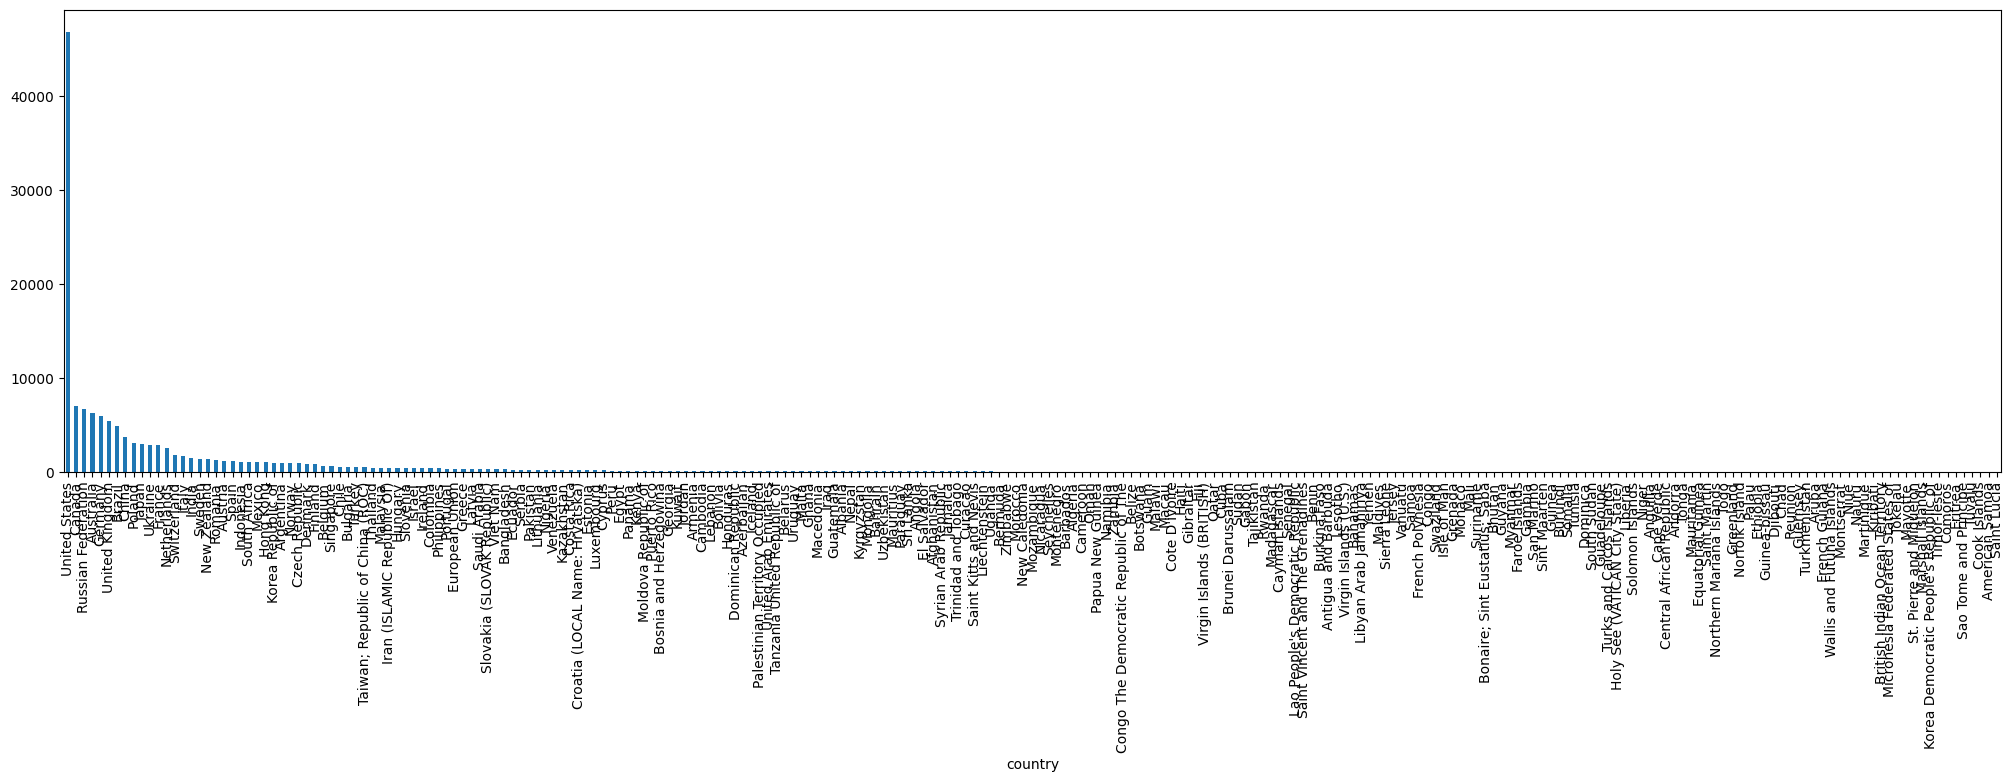

In [24]:
ip_address_country['country'].value_counts().plot(kind='bar',figsize=(25,6))


### Bivariate Analysis

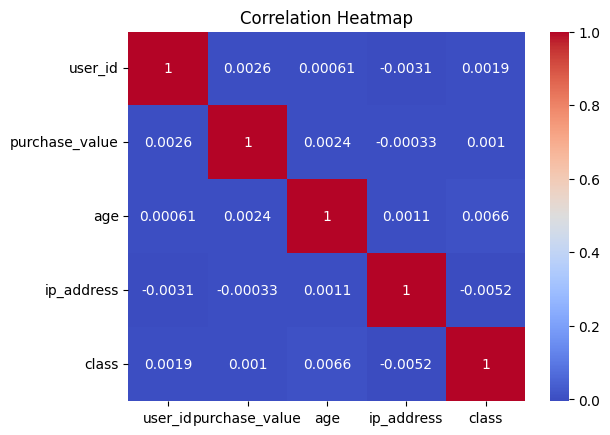

In [25]:
# Bivariate Analysis (Correlation Heatmap)
numerical_fraud_data= fraud_data.select_dtypes(include='number')
sns.heatmap(numerical_fraud_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


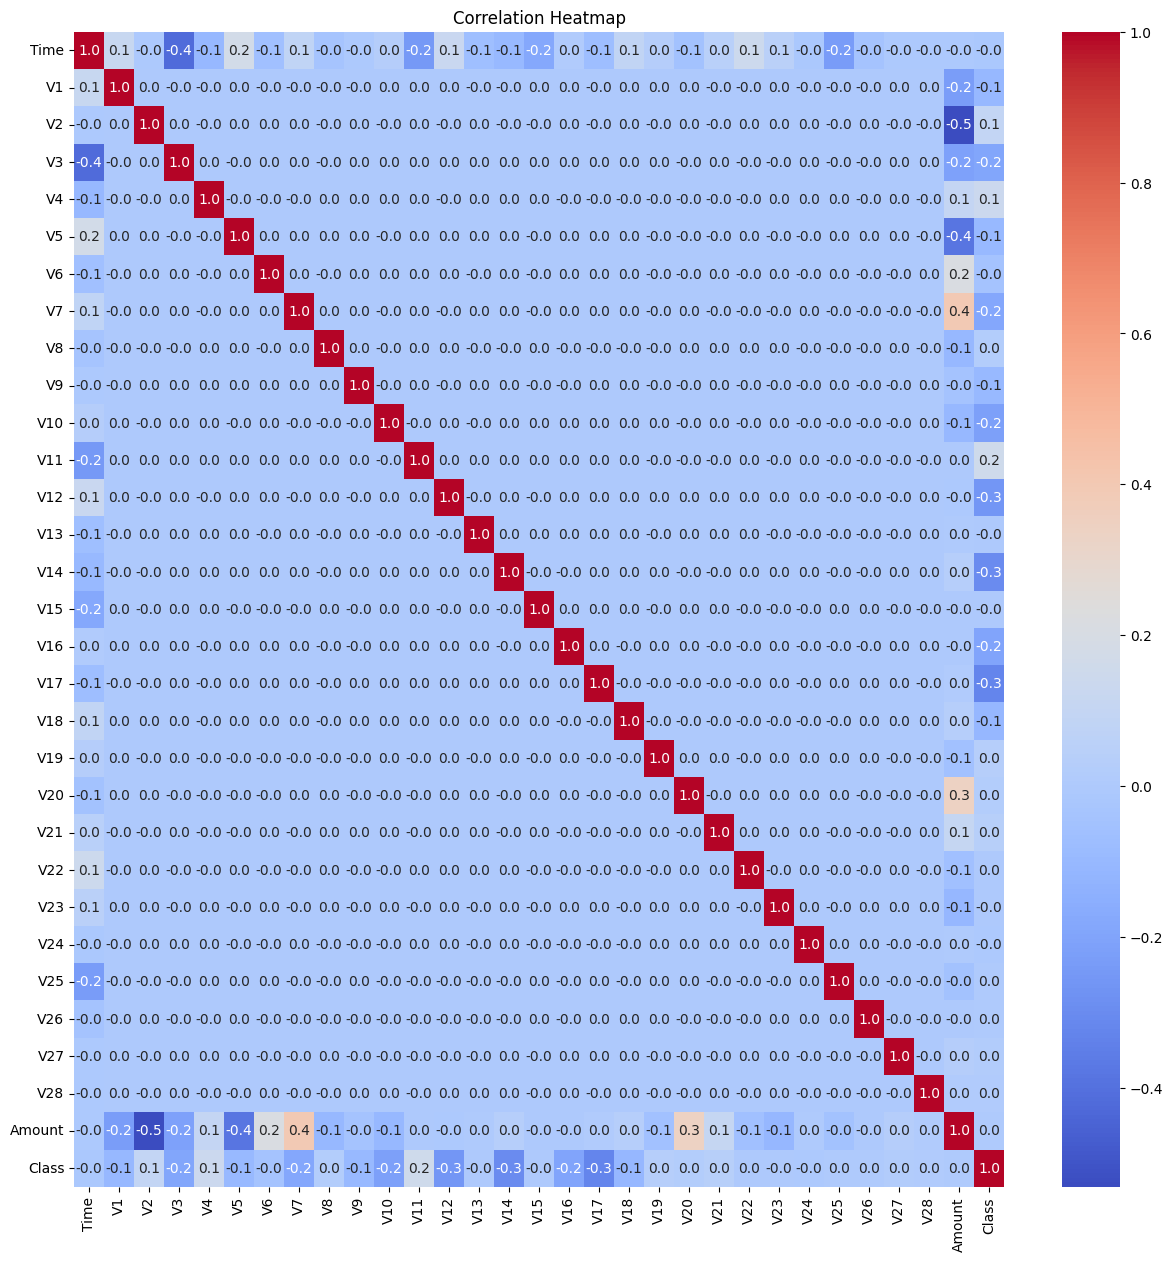

In [26]:
# Bivariate Analysis (Correlation Heatmap)
# numerical_fraud_data= credit_card_data.select_dtypes(include='number')
plt.figure(figsize=(15,15))
sns.heatmap(credit_card_data.corr(), annot=True,fmt=".1f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Merge Datasets for Geolocation Analysis

In [27]:
fraud_data = fraud_data.sort_values('ip_address')
ip_address_country = ip_address_country.sort_values('lower_bound_ip_address')
merged_fraud_data = pd.merge_asof(
    fraud_data, 
    ip_address_country, 
    left_on='ip_address', 
    right_on='lower_bound_ip_address', 
    direction='backward'
)
# Filter out rows where IP does not fall within the range
merged_fraud_data = merged_fraud_data[
    (merged_fraud_data['ip_address'] >= merged_fraud_data['lower_bound_ip_address']) & 
    (merged_fraud_data['ip_address'] <= merged_fraud_data['upper_bound_ip_address'])
]


In [28]:
merged_fraud_data.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,16778240.0,16779263.0,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,16809984.0,16842751.0,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,16843264.0,16843775.0,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,16924672.0,16941055.0,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,16941056.0,16973823.0,Thailand


### Feature Engineering


### Calculate Transaction Frequency and Velocity

In [29]:
merged_fraud_data['purchase_time'] = pd.to_datetime(merged_fraud_data['purchase_time'])


In [30]:
# Calculate transaction frequency per user
transaction_frequency = merged_fraud_data.groupby('device_id').size().reset_index(name='transaction_frequency')
# Merge back with the original data
merged_fraud_data = merged_fraud_data.merge(transaction_frequency, on='device_id')


In [31]:
# Sort by user_id and purchase_time
merged_fraud_data = merged_fraud_data.sort_values(by=['user_id', 'purchase_time'])

# Calculate time difference (in seconds) between consecutive transactions for the same user
merged_fraud_data['transaction_velocity'] = merged_fraud_data.groupby('user_id')['purchase_time'].diff().dt.total_seconds().fillna(0)


### Time-based features

In [32]:
merged_fraud_data['hour_of_day'] = pd.to_datetime(merged_fraud_data['purchase_time']).dt.hour
merged_fraud_data['day_of_week'] = pd.to_datetime(merged_fraud_data['purchase_time']).dt.dayofweek


In [33]:
merged_fraud_data.tail()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,transaction_frequency,transaction_velocity,hour_of_day,day_of_week
53346,399992,2015-06-04 17:43:28,2015-09-30 07:19:17,82,CNVFEDSCAWXGS,Direct,Safari,M,59,1549469282,0,1.549271e+09,1.549795e+09,France,1,0.0,7,2
94166,399993,2015-07-30 03:41:08,2015-10-01 07:16:25,20,XJMTBAKOHKTGR,Direct,IE,F,37,2755338335,0,2.755330e+09,2.755396e+09,Germany,1,0.0,7,3
127114,399995,2015-03-10 05:19:31,2015-06-05 23:36:56,33,RYXNXTOXIYRQG,Direct,FireFox,F,35,3701447303,0,3.701441e+09,3.701473e+09,Japan,1,0.0,23,4
118057,399997,2015-06-30 09:02:16,2015-10-07 20:56:54,66,XFNGDCCMMBTCB,Direct,Chrome,M,48,3454704355,0,3.454697e+09,3.454730e+09,United States,1,0.0,20,2
41156,400000,2015-03-16 23:03:56,2015-04-20 06:27:52,58,ACINFPOJYYUAW,Ads,Chrome,M,25,1217910956,1,1.217397e+09,1.218445e+09,United States,1,0.0,6,0


In [34]:
merged_fraud_data['transaction_frequency'].value_counts()


transaction_frequency
1     113812
2       7796
11       979
12       948
10       790
14       742
13       702
9        585
16       528
15       525
8        496
7        294
17       204
3        195
6        144
18       144
20       100
19        95
5         55
4         12
Name: count, dtype: int64

In [35]:
merged_fraud_data['signup_time'] = pd.to_datetime(merged_fraud_data['signup_time'])
merged_fraud_data['sex'] = merged_fraud_data['sex'].replace({'F': 0, 'M': 1})


### Encode Categorical Features

In [36]:
from sklearn.preprocessing import OneHotEncoder


In [37]:
merged_fraud_data['device_id'].value_counts()


device_id
NGQCKIADMZORL    20
CQTUVBYIWWWBC    20
KIPFSCNUGOLDP    20
ZUSVMDEZRBDTX    20
EQYVNEGOFLAWK    20
                 ..
PRVVQJWHVTURQ     1
OTRRFUOSBOQQZ     1
EWGJVRRCAIVFI     1
GDDGMJSSYPNCU     1
MTCUEQTBCCKZJ     1
Name: count, Length: 118434, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder




In [39]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def encodingCategoricalVariables(dataframe):
    # Specify the categorical columns that you want to encode
    categorical_columns = ['device_id','source','browser','country']
    
    # Initialize LabelEncoder
    encoder = LabelEncoder()
    
    # Apply label encoding to each specified categorical column
    for col in categorical_columns:
        dataframe[col + '_encoded'] = encoder.fit_transform(dataframe[col])
    
    # Optionally, you can drop the original categorical columns if you don't need them anymore
    dataframe.drop(columns=categorical_columns, inplace=True)
    
    return dataframe



In [40]:
encoded_dataframe = encodingCategoricalVariables(merged_fraud_data)
encoded_dataframe.head()


,user_id,signup_time,purchase_time,purchase_value,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,transaction_frequency,transaction_velocity,hour_of_day,day_of_week,device_id_encoded,source_encoded,browser_encoded,country_encoded
30049,2,2015-01-11 03:47:13,2015-02-21 10:03:37,54,0,25,880217484,0,8.724152e+08,8.891924e+08,1,0.0,10,5,23685,2,0,171
95244,4,2015-06-02 16:40:57,2015-09-26 21:32:16,41,0,38,2785906106,0,2.785542e+09,2.786066e+09,1,0.0,21,5,56090,1,4,157
11606,8,2015-05-28 07:53:06,2015-08-13 11:53:07,47,1,25,356056736,0,3.523215e+08,3.690988e+08,1,0.0,11,3,82397,2,0,171
101959,12,2015-01-10 06:25:12,2015-03-04 20:56:37,35,1,19,2985180352,0,2.985034e+09,2.985296e+09,1,0.0,20,2,57518,0,4,107
19600,16,2015-02-03 13:48:23,2015-03-12 12:46:23,9,1,32,578312545,0,5.704253e+08,5.872026e+08,1,0.0,12,3,25758,1,2,171


In [41]:
encoded_dataframe.drop(columns=['signup_time','purchase_time'],inplace=True)


In [43]:
encoded_dataframe.head()


,user_id,purchase_value,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,transaction_frequency,transaction_velocity,hour_of_day,day_of_week,device_id_encoded,source_encoded,browser_encoded,country_encoded
30049,2,54,0,25,880217484,0,8.724152e+08,8.891924e+08,1,0.0,10,5,23685,2,0,171
95244,4,41,0,38,2785906106,0,2.785542e+09,2.786066e+09,1,0.0,21,5,56090,1,4,157
11606,8,47,1,25,356056736,0,3.523215e+08,3.690988e+08,1,0.0,11,3,82397,2,0,171
101959,12,35,1,19,2985180352,0,2.985034e+09,2.985296e+09,1,0.0,20,2,57518,0,4,107
19600,16,9,1,32,578312545,0,5.704253e+08,5.872026e+08,1,0.0,12,3,25758,1,2,171


### Normalization and Scaling

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_fraud_data = scaler.fit_transform(encoded_dataframe)
normalized_fraud_dataframe = pd.DataFrame(normalized_fraud_data, columns=encoded_dataframe.columns)



In [48]:
normalized_fraud_dataframe.head()


,user_id,purchase_value,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,transaction_frequency,transaction_velocity,hour_of_day,day_of_week,device_id_encoded,source_encoded,browser_encoded,country_encoded
0,0.000000,0.310345,0.0,0.120690,0.230787,0.0,0.228703,0.233185,0.0,0.0,0.434783,0.833333,0.199986,1.0,0.0,0.950000
1,0.000005,0.220690,0.0,0.344828,0.740156,0.0,0.740063,0.740197,0.0,0.0,0.913043,0.833333,0.473601,0.5,1.0,0.872222
2,0.000015,0.262069,1.0,0.120690,0.090685,0.0,0.089687,0.094171,0.0,0.0,0.478261,0.500000,0.695727,1.0,0.0,0.950000
3,0.000025,0.179310,1.0,0.017241,0.793420,0.0,0.793385,0.793449,0.0,0.0,0.869565,0.333333,0.485659,0.0,1.0,0.594444
4,0.000035,0.000000,1.0,0.241379,0.150092,0.0,0.147984,0.152467,0.0,0.0,0.521739,0.500000,0.217490,0.5,0.5,0.950000
